In [1]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving creditcard_2023.csv to creditcard_2023.csv


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# ตรวจสอบ Missing Value
missing = df.isnull().sum()
print("\nMissing values per column:")
print(missing)

print("\nTotal Missing Values:", missing.sum())

# ถ้ามี Missing Value ทำการลบทันที
df = df.dropna()

print("\nShape after dropna():", df.shape)


Missing values per column:
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Total Missing Values: 0

Shape after dropna(): (568630, 31)


In [5]:
# ตรวจสอบ Duplicate
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

df = df.drop_duplicates()

print("Shape after drop_duplicates():", df.shape)


Number of Duplicate Rows: 0
Shape after drop_duplicates(): (568630, 31)


In [6]:
# ตรวจสอบ Class Imbalance
class_counts = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("\nClass Distribution (Count):")
print(class_counts)

print("\nClass Distribution (%):")
print(class_percentage)


Class Distribution (Count):
Class
0    284315
1    284315
Name: count, dtype: int64

Class Distribution (%):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [28]:
df_clean = df.drop(columns=['id'])

desc = df_clean.describe().T

desc_styled = (
    desc
    .round(6)
    .style
    .format("{:.6f}")
    .set_caption("Descriptive Statistics Table")
)
desc_styled

,count,mean,std,min,25%,50%,75%,max
V1,568630.000000,-0.000000,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.000000,-0.000000,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.000000,-0.000000,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.000000,-0.000000,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.000000,0.000000,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.000000,-0.000000,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.000000,-0.000000,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.000000,0.000000,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.000000,0.000000,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.000000,0.000000,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


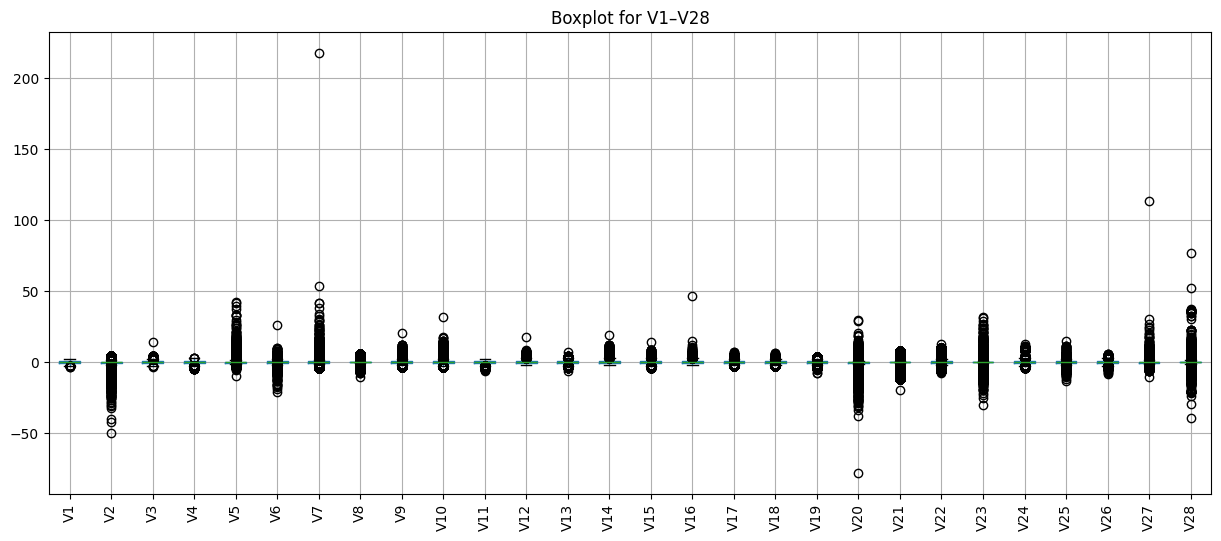

In [20]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop(['id', 'Class'])

v_cols = [f"V{i}" for i in range(1,29)]
plt.figure(figsize=(15,6))
df[v_cols].boxplot(rot=90)
plt.title("Boxplot for V1–V28")
plt.show()

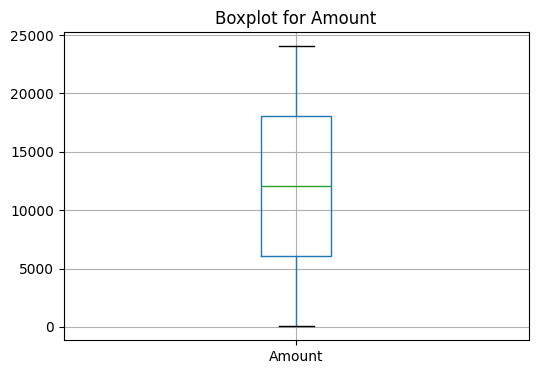

In [19]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop(['id', 'Class'])

plt.figure(figsize=(6,4))
df[['Amount']].boxplot()
plt.title("Boxplot for Amount")
plt.show()

In [46]:
# Train/Test Split (Stratified)

# Drop คอลัมน์ ID
df_model = df.drop(columns=['id'])

X = df_model.drop(columns=['Class'])
y = df_model['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train size: (454904, 29)
Test size: (113726, 29)

Train class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64

Test class distribution:
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


In [48]:
# Scaling
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# scale เฉพาะ Amount
X_train_scaled[['Amount']] = scaler.fit_transform(X_train[['Amount']])
X_test_scaled[['Amount']] = scaler.transform(X_test[['Amount']])

In [51]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)
log_model.fit(X_train_scaled, y_train)

# เริ่มการทำนายผล ของ Test
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# ประเมินผลของ Test
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.9653289485254032
Recall   : 0.953115382586216
F1-score : 0.9649002554812751
ROC-AUC  : 0.9935561877451883

Confusion Matrix:
[[55586  1277]
 [ 2666 54197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [68]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# กำหนด threshold ค่าเดียว
threshold = 0.35

y_pred_rf = (y_prob_rf >= threshold).astype(int)

print("=== Random Forest (Custom Threshold) ===")
print("Threshold:", threshold)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest (Custom Threshold) ===
Threshold: 0.35
Accuracy : 0.980558535427255
Precision: 0.9898712846437919
Recall   : 0.9710532332096442
F1-score : 0.9803719650228594
ROC-AUC  : 0.9978918867511409

Confusion Matrix:
[[56298   565]
 [ 1646 55217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [78]:
importance_df = pd.DataFrame({
    "ตัวแปร": X_train.columns,
    "ความสำคัญ": rf_model.feature_importances_
})

importance_df = importance_df.sort_values(
    by="ความสำคัญ",
    ascending=False
)
importance_df["ความสำคัญ (%)"] = (
    importance_df["ความสำคัญ"] * 100
).round(2)

print(importance_df.head(5))


   ตัวแปร  ความสำคัญ  ความสำคัญ (%)
13    V14   0.175566          17.56
9     V10   0.172091          17.21
3      V4   0.123075          12.31
11    V12   0.112992          11.30
10    V11   0.103227          10.32
